In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', size=14)
rc('font', family='Arial')
# rc('font', serif='Times')
rc('pdf', fonttype=42)
# rc('text', usetex=True)


In [2]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


In [3]:
folder = os.path.join('Y:',os.sep,'Nicola_Gritti','analysis_code','scRNAseq_Gastruloids','new_codes','results','integration','pijuan_anlas')


In [4]:
umap = pd.read_csv(os.path.join(folder,'integration_umap.csv'))
umap['cellname'] = umap.index
umap = umap.reset_index()

In [5]:
umap

,index,V1,V2,cellname
0,cell_1,0.383419,5.249228,cell_1
1,cell_2,-3.348407,3.917569,cell_2
2,cell_3,-2.452266,-12.011651,cell_3
3,cell_4,-0.560195,8.484165,cell_4
4,cell_5,1.348483,7.134074,cell_5
...,...,...,...,...
136341,h72_TTTGTTGCACTCCTGT-1,-3.419316,-1.992867,h72_TTTGTTGCACTCCTGT-1
136342,h72_TTTGTTGCAGCGATTT-1,7.177235,0.285251,h72_TTTGTTGCAGCGATTT-1
136343,h72_TTTGTTGCATGCCGCA-1,2.191742,-3.435134,h72_TTTGTTGCATGCCGCA-1
136344,h72_TTTGTTGGTCGTATGT-1,7.112209,1.891344,h72_TTTGTTGGTCGTATGT-1


In [6]:
meta_anlas = pd.read_csv(os.path.join(folder,'meta_anlas.csv'))
meta_pijuan = pd.read_csv(os.path.join(folder,'meta_pijuan.csv'))

meta_anlas['dataset'] = 'anlas'
meta_pijuan['dataset'] = 'pijuan'

meta = pd.concat([meta_pijuan,meta_anlas], ignore_index=True)
meta = meta[['celltype.general','batch.ident','celltype.anlas','celltype.pijuan','stage','merge.ident','dataset']]

meta = meta.rename(columns={'celltype.general':'celltype',
                            'celltype.anlas':'celltype_anlas',
                            'celltype.pijuan':'celltype_pijuan',
                            'merge.ident':'stage_anlas',
                            'stage':'stage_pijuan',
                            'batch.ident':'batch_ident'})


In [7]:
meta

,celltype,batch_ident,celltype_anlas,celltype_pijuan,stage_pijuan,stage_anlas,dataset
0,Epiblast,pijuan_E6.5_sample1,NaN,Epiblast,E6.5,NaN,pijuan
1,Primitive Streak,pijuan_E6.5_sample1,NaN,Primitive Streak,E6.5,NaN,pijuan
2,ExE,pijuan_E6.5_sample1,NaN,ExE ectoderm,E6.5,NaN,pijuan
3,Epiblast,pijuan_E6.5_sample1,NaN,Epiblast,E6.5,NaN,pijuan
4,Epiblast,pijuan_E6.5_sample1,NaN,Epiblast,E6.5,NaN,pijuan
...,...,...,...,...,...,...,...
136341,G Early diff,anlas_72h_rep1,"Early diff (SMAD, ERK activ)",NaN,NaN,72h,anlas
136342,G Mesodermal,anlas_72h_rep1,Mesodermal (mesench & cardiac),NaN,NaN,72h,anlas
136343,G Mesodermal,anlas_72h_rep1,Mesodermal trunk and neural,NaN,NaN,72h,anlas
136344,G Mesodermal,anlas_72h_rep1,Mesodermal,NaN,NaN,72h,anlas


In [8]:
meta[meta.celltype_anlas=='Early vascular & endo']

,celltype,batch_ident,celltype_anlas,celltype_pijuan,stage_pijuan,stage_anlas,dataset
132928,G Mesodermal,anlas_72h_rep1,Early vascular & endo,NaN,NaN,72h,anlas
133097,G Mesodermal,anlas_72h_rep1,Early vascular & endo,NaN,NaN,72h,anlas
133171,G Mesodermal,anlas_72h_rep1,Early vascular & endo,NaN,NaN,72h,anlas
133371,G Mesodermal,anlas_72h_rep1,Early vascular & endo,NaN,NaN,72h,anlas
133567,G Mesodermal,anlas_72h_rep1,Early vascular & endo,NaN,NaN,72h,anlas
133594,G Mesodermal,anlas_72h_rep1,Early vascular & endo,NaN,NaN,72h,anlas
134075,G Mesodermal,anlas_72h_rep1,Early vascular & endo,NaN,NaN,72h,anlas
134338,G Mesodermal,anlas_72h_rep1,Early vascular & endo,NaN,NaN,72h,anlas
134432,G Mesodermal,anlas_72h_rep1,Early vascular & endo,NaN,NaN,72h,anlas
134504,G Mesodermal,anlas_72h_rep1,Early vascular & endo,NaN,NaN,72h,anlas


In [9]:
# generate the replicate and stage columns

reps = []
for i in meta.batch_ident:
    if 'rep1' in i:
        reps.append('rep1')
    elif 'rep2' in i:
        reps.append('rep2')
    else:
        reps.append(np.nan)
meta['replicate'] = reps

meta = meta.replace(np.nan, 'None', regex=True)
stage = []
for i in range(len(meta.celltype)):
    sa = meta.stage_anlas[i]
    sp = meta.stage_pijuan[i]
    if sa=='None':
        stage.append(sp)
    else:
        stage.append(sa)
meta['stage'] = stage

In [10]:
# combine umap and metadata dataframes

df = pd.concat([umap,meta], axis=1)

In [11]:
df

,index,V1,V2,cellname,celltype,batch_ident,celltype_anlas,celltype_pijuan,stage_pijuan,stage_anlas,dataset,replicate,stage
0,cell_1,0.383419,5.249228,cell_1,Epiblast,pijuan_E6.5_sample1,None,Epiblast,E6.5,None,pijuan,None,E6.5
1,cell_2,-3.348407,3.917569,cell_2,Primitive Streak,pijuan_E6.5_sample1,None,Primitive Streak,E6.5,None,pijuan,None,E6.5
2,cell_3,-2.452266,-12.011651,cell_3,ExE,pijuan_E6.5_sample1,None,ExE ectoderm,E6.5,None,pijuan,None,E6.5
3,cell_4,-0.560195,8.484165,cell_4,Epiblast,pijuan_E6.5_sample1,None,Epiblast,E6.5,None,pijuan,None,E6.5
4,cell_5,1.348483,7.134074,cell_5,Epiblast,pijuan_E6.5_sample1,None,Epiblast,E6.5,None,pijuan,None,E6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136341,h72_TTTGTTGCACTCCTGT-1,-3.419316,-1.992867,h72_TTTGTTGCACTCCTGT-1,G Early diff,anlas_72h_rep1,"Early diff (SMAD, ERK activ)",None,None,72h,anlas,rep1,72h
136342,h72_TTTGTTGCAGCGATTT-1,7.177235,0.285251,h72_TTTGTTGCAGCGATTT-1,G Mesodermal,anlas_72h_rep1,Mesodermal (mesench & cardiac),None,None,72h,anlas,rep1,72h
136343,h72_TTTGTTGCATGCCGCA-1,2.191742,-3.435134,h72_TTTGTTGCATGCCGCA-1,G Mesodermal,anlas_72h_rep1,Mesodermal trunk and neural,None,None,72h,anlas,rep1,72h
136344,h72_TTTGTTGGTCGTATGT-1,7.112209,1.891344,h72_TTTGTTGGTCGTATGT-1,G Mesodermal,anlas_72h_rep1,Mesodermal,None,None,72h,anlas,rep1,72h


In [12]:
df1 = df[df.dataset=='pijuan']
# df1 = df1.sample(n=10000, random_state=1)

# batch effect

In [13]:
cp = sns.color_palette("husl", 7)
ca = ['maroon','blue']
cp = [lighten_color(i,0.25) for i in cp]

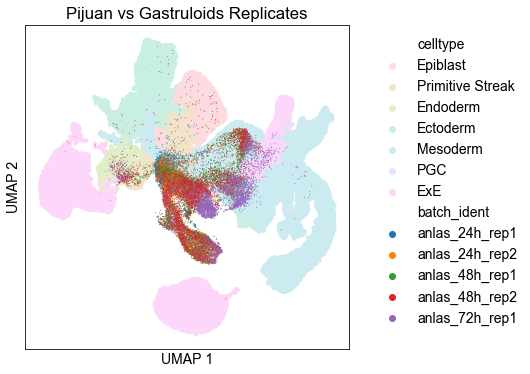

In [63]:
df2 = df[df.dataset=='anlas']

fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=['Epiblast','Primitive Streak','Endoderm','Ectoderm','Mesoderm','PGC','ExE'],
                palette = cp,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax,
                rasterized=True
               )
sns.scatterplot(data=df2, x='V1', y='V2',
                s=1,
                hue='batch_ident', 
#                 palette = ca,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax,
                rasterized=True
               )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Pijuan vs Gastruloids Replicates')

plt.legend(frameon=False,bbox_to_anchor=(1.05, 1))

#fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrFateAll.pdf'), dpi=600)

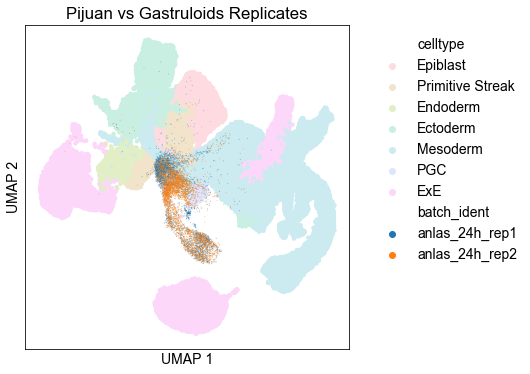

In [61]:
df2 = df[(df.dataset=='anlas')&(df.stage_anlas=='24h')]

fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=['Epiblast','Primitive Streak','Endoderm','Ectoderm','Mesoderm','PGC','ExE'],
                palette = cp,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax,
                rasterized=True
               )
sns.scatterplot(data=df2, x='V1', y='V2',
                s=1,
                hue='batch_ident', 
#                 palette = ca,
                linewidth=0, alpha=.5, 
                edgecolors='none',
                ax=ax,
                rasterized=True
               )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Pijuan vs Gastruloids Replicates')

plt.legend(frameon=False,bbox_to_anchor=(1.05, 1))

#fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrFateAll.pdf'), dpi=600)

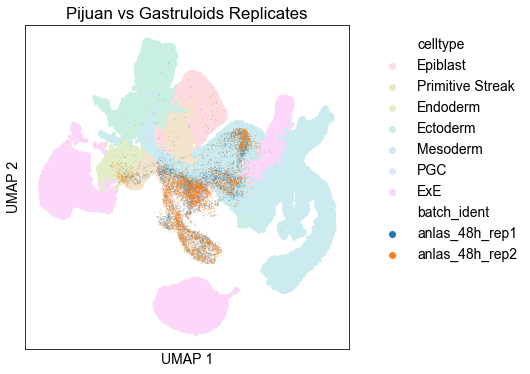

In [60]:
df2 = df[(df.dataset=='anlas')&(df.stage_anlas=='48h')]

fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=['Epiblast','Primitive Streak','Endoderm','Ectoderm','Mesoderm','PGC','ExE'],
                palette = cp,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax,
                rasterized=True
               )
sns.scatterplot(data=df2, x='V1', y='V2',
                s=1,
                hue='batch_ident', 
#                 palette = ca,
                linewidth=0, alpha=.5, 
                edgecolors='none',
                ax=ax,
                rasterized=True
               )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Pijuan vs Gastruloids Replicates')

plt.legend(frameon=False,bbox_to_anchor=(1.05, 1))

#fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrFateAll.pdf'), dpi=600)

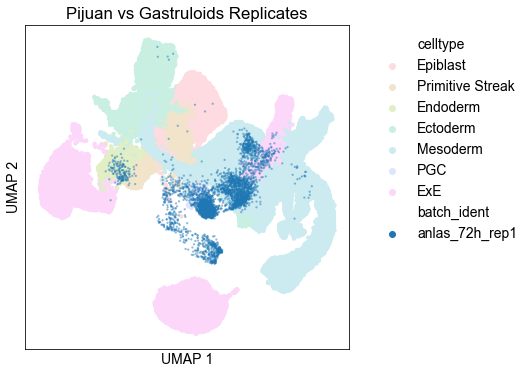

In [65]:
df2 = df[(df.dataset=='anlas')&(df.stage_anlas=='72h')]

fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=['Epiblast','Primitive Streak','Endoderm','Ectoderm','Mesoderm','PGC','ExE'],
                palette = cp,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax,
                rasterized=True
               )
sns.scatterplot(data=df2, x='V1', y='V2',
                s=5,
                hue='batch_ident', 
#                 palette = ca,
                linewidth=0, alpha=.5, 
                edgecolors='none',
                ax=ax,
                rasterized=True
               )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Pijuan vs Gastruloids Replicates')

plt.legend(frameon=False,bbox_to_anchor=(1.05, 1))

#fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrFateAll.pdf'), dpi=600)

# All cell types

In [53]:
cp = sns.color_palette("husl", 7)
ca = sns.color_palette("Paired")
ca = [(0.,0.,0.),ca[1],ca[3],ca[5],ca[7],ca[11],ca[9]]

In [54]:
cp = [lighten_color(i,0.25) for i in cp]

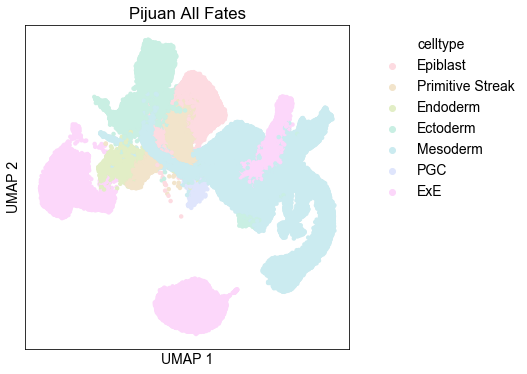

In [55]:
df2 = df[df.dataset=='anlas']

fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=['Epiblast','Primitive Streak','Endoderm','Ectoderm','Mesoderm','PGC','ExE'],
                palette = cp,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax,
                rasterized=True
               )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Pijuan All Fates')

plt.legend(frameon=False,bbox_to_anchor=(1.05, 1))

#fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrFateAll.pdf'), dpi=600)

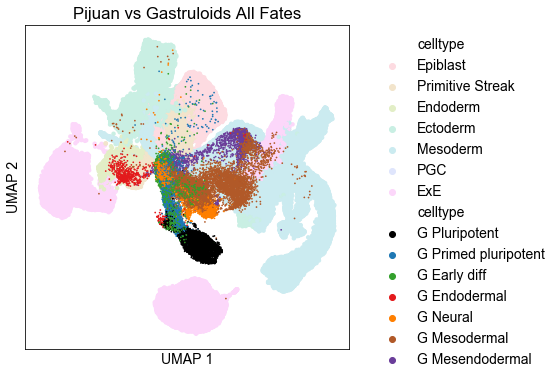

In [56]:
df2 = df[df.dataset=='anlas']

fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=['Epiblast','Primitive Streak','Endoderm','Ectoderm','Mesoderm','PGC','ExE'],
                palette = cp,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax,
                rasterized=True
               )
sns.scatterplot(data=df2, x='V1', y='V2',
                s=3,
                hue='celltype', 
                hue_order=['G Pluripotent','G Primed pluripotent','G Early diff','G Endodermal','G Neural','G Mesodermal','G Mesendodermal'],
                palette = ca,
                linewidth=0, alpha=1., 
                edgecolors='none',
                ax=ax,
                rasterized=True
               )
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Pijuan vs Gastruloids All Fates')

plt.legend(frameon=False,bbox_to_anchor=(1.05, 1))

fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrFateAll.pdf'), dpi=600)

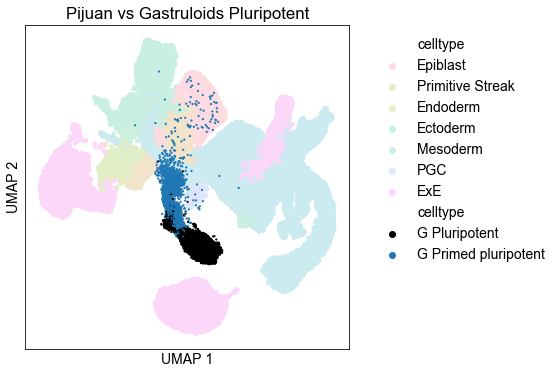

In [66]:
df2 = df[(df.dataset=='anlas')&((df.celltype=='G Pluripotent')|(df.celltype=='G Primed pluripotent'))]
   
fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=['Epiblast','Primitive Streak','Endoderm','Ectoderm','Mesoderm','PGC','ExE'],
                palette = cp,
                linewidth=0, alpha=1., 
                ax=ax,
                rasterized=True)
sns.scatterplot(data=df2, x='V1', y='V2',
                s=5,
                hue='celltype', 
                hue_order=['G Pluripotent','G Primed pluripotent'],
                palette = ca[:2],
                linewidth=0, alpha=1., 
                ax=ax,
                rasterized=True)

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Pijuan vs Gastruloids Pluripotent')

plt.legend(frameon=False,bbox_to_anchor=(1.05, 1))

fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrFate1.pdf'), dpi=600)

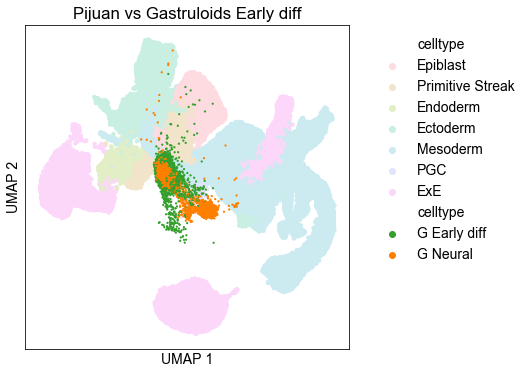

In [67]:
df2 = df[(df.dataset=='anlas')&((df.celltype=='G Early diff')|(df.celltype=='G Neural'))]
   
fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=['Epiblast','Primitive Streak','Endoderm','Ectoderm','Mesoderm','PGC','ExE'],
                palette = cp,
                linewidth=0, alpha=1., 
                ax=ax,
                rasterized=True)
sns.scatterplot(data=df2, x='V1', y='V2',
                s=5,
                hue='celltype',
                color='k',
                hue_order=['G Early diff','G Neural'],
                palette = [ca[2],ca[4]],
                linewidth=0, alpha=1., 
                ax=ax,
                rasterized=True)

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Pijuan vs Gastruloids Early diff')

plt.legend(frameon=False,bbox_to_anchor=(1.05, 1))

fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrFate2.pdf'), dpi=600)

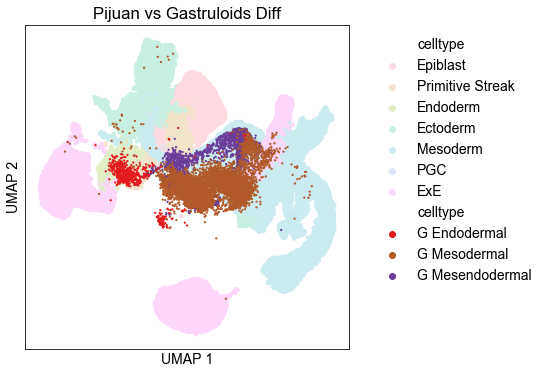

In [68]:
df2 = df[(df.dataset=='anlas')&((df.celltype=='G Endodermal')|(df.celltype=='G Mesodermal')|(df.celltype=='G Mesendodermal'))]
   
fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=['Epiblast','Primitive Streak','Endoderm','Ectoderm','Mesoderm','PGC','ExE'],
                palette = cp,
                linewidth=0, alpha=1., 
                ax=ax,
                rasterized=True)
sns.scatterplot(data=df2, x='V1', y='V2',
                s=5,
                hue='celltype',
                color='k',
                hue_order=['G Endodermal','G Mesodermal','G Mesendodermal'],
                palette = [ca[3],ca[5],ca[6]],
                linewidth=0, alpha=1., 
                ax=ax,
                rasterized=True)

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Pijuan vs Gastruloids Diff')

plt.legend(frameon=False,bbox_to_anchor=(1.05, 1))

fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrFate3.pdf'), dpi=600)

# Anlas Stage

In [69]:
ca = sns.color_palette("rocket")
ca  =[ca[0],ca[2],ca[4]]

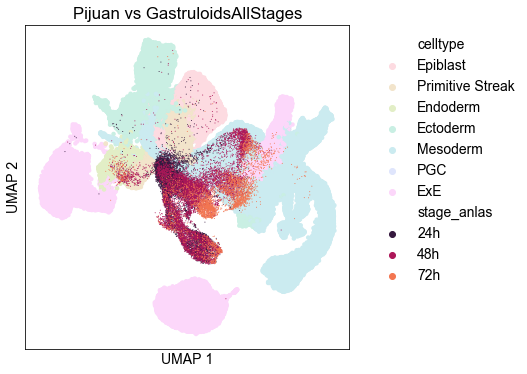

In [70]:
fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

g1 = sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=['Epiblast','Primitive Streak','Endoderm','Ectoderm','Mesoderm','PGC','ExE'],
                palette = cp,
                linewidth=0, alpha=1., 
                ax=ax,
                rasterized=True)
g2 = sns.scatterplot(data=df[(df.dataset=='anlas')], x='V1', y='V2',
                s=1.,
                hue='stage_anlas',
                palette = ca,
                linewidth=0, alpha=1., 
                ax=ax,
                rasterized=True)

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Pijuan vs GastruloidsAllStages')

plt.legend(frameon=False,bbox_to_anchor=(1.05, 1))

fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrStageAll.pdf'), dpi=600)

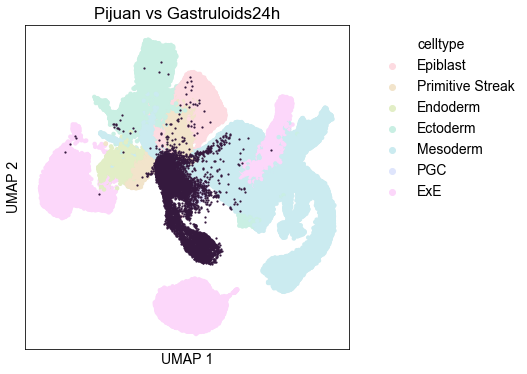

In [71]:
df2 = df[(df.dataset=='anlas')&(df.stage_anlas=='24h')]

fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

g1 = sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=['Epiblast','Primitive Streak','Endoderm','Ectoderm','Mesoderm','PGC','ExE'],
                palette = cp,
                linewidth=0, alpha=1., 
                ax=ax,
                rasterized=True)
g2 = sns.scatterplot(data=df2, x='V1', y='V2',
                s=5,
#                 hue='replicate',
                color = ca[0],
                linewidth=0, alpha=1.,
                edgecolors='none',
                ax=ax,
                rasterized=True)

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Pijuan vs Gastruloids24h')

plt.legend(frameon=False,bbox_to_anchor=(1.05, 1))

fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrStage24h.pdf'), dpi=600)

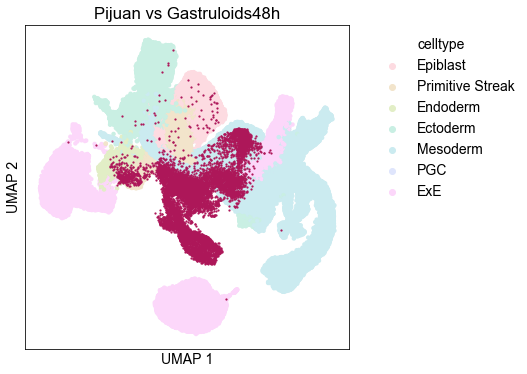

In [72]:
df2 = df[(df.dataset=='anlas')&(df.stage_anlas=='48h')]

fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

g1 = sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=['Epiblast','Primitive Streak','Endoderm','Ectoderm','Mesoderm','PGC','ExE'],
                palette = cp,
                linewidth=0, alpha=1., 
                ax=ax,
                rasterized=True)
g2 = sns.scatterplot(data=df2, x='V1', y='V2',
                s=5,
#                 hue='replicate',
                color = ca[1],
                linewidth=0, alpha=1., 
                ax=ax,
                rasterized=True)                     

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Pijuan vs Gastruloids48h')

plt.legend(frameon=False,bbox_to_anchor=(1.05, 1))

fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrStage48h.pdf'), dpi=600)

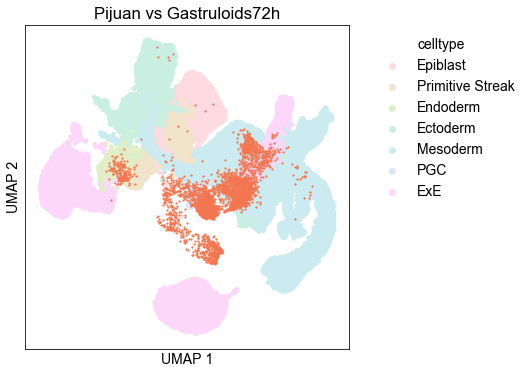

In [73]:
df2 = df[(df.dataset=='anlas')&(df.stage_anlas=='72h')]

fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(left=0.15, right=0.6, top=0.9, bottom=0.15)

g1 = sns.scatterplot(data=df1, x='V1', y='V2',
                s=20,
                hue='celltype', 
                hue_order=['Epiblast','Primitive Streak','Endoderm','Ectoderm','Mesoderm','PGC','ExE'],
                palette = cp,
                linewidth=0, alpha=1., 
                ax=ax,
                rasterized=True)
g2 = sns.scatterplot(data=df2, x='V1', y='V2',
                s=5,
#                 hue='replicate',
                color = ca[2],
                linewidth=0, alpha=1., 
                ax=ax,
                rasterized=True)

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Pijuan vs Gastruloids72h')

plt.legend(frameon=False,bbox_to_anchor=(1.05, 1))

fig.savefig(os.path.join(folder,'pijuanFate_vs_gastrStage72h.pdf'), dpi=600)